## Pre-requisite exam

#### Q1 . How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

No of Multiplication is needed to perform a matrix multiplication between A(n, k) and B(k, m) is n*k*m.
A has n Rows & k Columns and B has k Rows & m Columns. so, AB has dimention (n, m) 
and each element of AB has k times multiplications of A elements & B elements.

No of Addition is needed to perform a matrix multiplication between A(n, k) and B(k, m) is n*(k-1)*m.
Adding the product of k multiplication of each element of AB, we need (k-1) addition. 

#### Q2 . Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [28]:
# Using list of Lists
import time
A = [[1,2,3],
     [3,4,5]]
B = [[1,2],
     [3,4],
     [5,6]]
def matrixMultiplication(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for p in range(k):
                C[i][j] += A[i][p]*B[p][j]
    return C;

C = matrixMultiplication(A, B)
for row in C:
    print(row)


[22, 28]
[40, 52]


In [29]:
# Using numpy 
import numpy as np
import time
A = np.array([[1,2,3],
     [3,4,5]])
B = np.array([[1,2],
     [3,4],
     [5,6]])
C = np.dot(A, B)
print(C)


[[22 28]
 [40 52]]


In [30]:
# Comparition

n, k, m = 200, 300, 500
A = np.random.rand(n, k)
B = np.random.rand(k, m)

start_time = time.time()
C_numpy = np.dot(A, B)
time_taken = time.time() - start_time
print(f"numpy time:{time_taken:.6f}")

A = A.tolist()
B = B.tolist()

def matrixMultiplication(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for p in range(k):
                C[i][j] += A[i][p]*B[p][j]
    return C

start_time = time.time()
C_python = matrixMultiplication(A, B)
time_taken_python = time.time() - start_time
print(f"pure python time:{time_taken_python:.6f}")



numpy time:0.014360
pure python time:14.507596


Numpy : Numpy is implemented in C Language. It is operated in highly optimized libraries like BLAS (Basic Linear Algebra subproblem) and LAPACK (Linear Algebra Package) which allows numpy work on lower level(close to hardware) to work efficently faster. It vectorize the arrays to perform Matrix Multiplication thus it can avoid loop overhead and can run parallelly in different CPU Core.

Pyhton: On the other hand python code interpreted line by line and take more time perform nested loop which eventually take more time than numpy.

#### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the above method, Time complexity to find median of an array is O(n^2) where n is no. of element in the array.

Better Method : After sorting the array, finding median will take O(1) time. Time Complexity of sorting is O(n log n).

In [31]:
# Using Passing Method
def find_midian(nums):
    n = len(nums)
    for i in range(n):
        for j in range(0,n-i-1):
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]
    if n%2 == 0:
        return (nums[n//2] + nums[n//2 -1]) /2;
    else:
        return (nums[n//2])

nums = [2,9,5,7,6,4]
print(find_midian(nums))

5.5


In [32]:
# Using Better / Soring Method
def find_midian(nums):
    n = len(nums)
    nums.sort()
    if n%2 == 0:
        return (nums[n//2] + nums[n//2 -1]) /2;
    else:
        return (nums[n//2])

nums = [2,9,5,7,6,4]
print(find_midian(nums))

5.5


In [33]:
# Using numpy
import numpy as np
def find_midian(nums):
    return np.median(nums)

nums = [2,9,5,7,6,4]
print(find_midian(nums))

5.5


Numpy can perform median in larger data without sorting in lesser time than the above methods.

#### Q4. What is the gradient of the following function with respect to x and y?   (x^2).y + (y^3).sin(x)

f(x, y) = (x^2).y + (y^3).sin(x)

The gradient of f, denoted as ∇f, is given by: 

∇f = (∂f/∂x, ∂f/∂y)

Patial Derivative with respect to x (treting y as constant) 

∂f/∂x = 2xy + (y^3).cos(x)

Patial Derivative with respect to y (treting x as constant) 

∂f/∂y = (x^2) + 3(y^2).sin(x)

The Gradient of the function f(x, y) = (x^2).y + (y^3).sin(x) is

∇f = (2xy + (y^3).cos(x), (x^2) + 3(y^2).sin(x))


#### Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [34]:
import jax
import jax.numpy as jnp

def f(x, y):
  return (x**2) * y + (y**3) * jnp.sin(x)

x , y = 1.0, 2.0

gd = (2*x*y + (y**3)* jnp.cos(x), (x**2) + 3*(y**2) * jnp.sin(x))

# Compute the gradient of f
grad_f = jax.grad(f)

print("Manually Computed: ",gd[0], gd[1])
print("Using JAX: ",grad_f(x, y))

Manually Computed:  8.322418 11.0976515
Using JAX:  8.322418


#### Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [35]:
import sympy as sp
import jax
import jax.numpy as jnp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function symbolically
f_sym = x**2 * y + y**3 * sp.sin(x)

# Calculate the symbolic gradient
# Convert symbolic gradient to a Python function
grad_f_sym = sp.Matrix([f_sym]).jacobian([x, y])
grad_f_sym_lambda = sp.lambdify((x, y), grad_f_sym)

# Define the numerical function
def f(x, y):
  return (x**2) * y + (y**3) * jnp.sin(x)

# Compute the numerical gradient
grad_f = jax.grad(f)

# Test the gradients
x_val, y_val = 1.0, 2.0
analytical_grad = grad_f_sym_lambda(x_val, y_val)
numerical_grad = grad_f(x_val, y_val)

print("Analytical gradient:", analytical_grad)
print("Numerical gradient:", numerical_grad)


Analytical gradient: [[ 8.32241845 11.09765182]]
Numerical gradient: 8.322418


#### Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022

Branch 1

Roll Number: 1, Name: N, Marks:

                               Maths: 100, English: 70 …
Branch 2


2023

Branch 1

Branch 2


2024

Branch 1

Branch 2


2025

Branch 1

Branch 2

In [36]:
details = {2022:{"Branch 1" :{"1" :{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 54, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 55, "English":63, "Physics":66 }}},
                 "Branch 2" :{"1":{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 56, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 57, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 58, "English":63, "Physics":66 }}}},
           
           2023:{"Branch 1" :{"1" :{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}},
                 "Branch 2" :{"1":{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}}},
           
           2024:{"Branch 1" :{"1" :{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}},
                 "Branch 2" :{"1":{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}}},

           2025:{"Branch 1" :{"1" :{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}},
                 "Branch 2" :{"1":{"RollNo" : 1, "Name": "A", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "2" :{"RollNo" : 2, "Name": "B", "Marks": {"Maths" : 53, "English":63, "Physics":66 }},
                              "3" :{"RollNo" : 3, "Name": "C", "Marks": {"Maths" : 53, "English":63, "Physics":66 }}}}}

#### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects.Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [37]:



class Student:
    def __init__(self, rollno, name, marks):
        self.rollno = rollno
        self.name = name
        self.marks = []
        
        
class Branch:
    def __init__(self, branch):
        self.branch = branch
        self.students = []

    def add_student(self, student):
        self.students.append(student)
        
class Year:
    def __init__(self, year):
        self.year = year
        self.branches =[]

    def add_branches(self, branch):
        self.branches.append(branch)

db = []
y2022 = Year(2022)
y2023 = Year(2023)
y2024 = Year(2024)
y2025 = Year(2025)

branch1 = Branch("CSE")
branch2 = Branch("ECE")

student1 = Student("A", 1, {"Math": 85, "English":67})
student2 = Student("B", 2, {"Math": 78, "English":97})
student3 = Student("C", 3, {"Math": 65, "English":98})
student4 = Student("D", 4, {"Math": 67, "English":87})
student5 = Student("E", 5, {"Math": 85, "English":67})
student6 = Student("F", 6, {"Math": 78, "English":97})
student7 = Student("G", 7, {"Math": 65, "English":98})
student8 = Student("H", 8, {"Math": 67, "English":87})

branch1.add_student(student1)
branch1.add_student(student2)
branch1.add_student(student3)
branch1.add_student(student4)

branch2.add_student(student5)
branch2.add_student(student6)
branch2.add_student(student7)
branch2.add_student(student8)

y2022.add_branches(branch1)
y2022.add_branches(branch2)

y2023.add_branches(branch1)
y2023.add_branches(branch2)

y2024.add_branches(branch1)
y2024.add_branches(branch2)

y2025.add_branches(branch1)
y2025.add_branches(branch2)

db.append(y2022)
db.append(y2023)
db.append(y2024)
db.append(y2025)



#### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. y = x
2. y = x^2
3. y = (x^3)/100
4. y = e^x

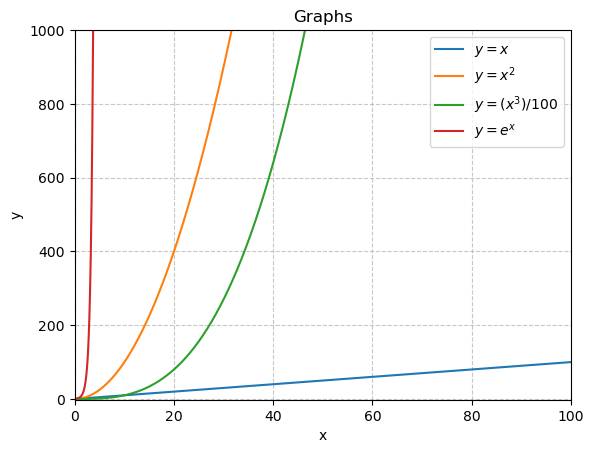

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5, 100, 2000)


y1 = x
y2 = x**2
y3 = (x**3)/100 
y7 = np.exp(x2)

plt.plot(x, y1, label = '$y=x$')
plt.plot(x, y2, label = '$y=x^2$')
plt.plot(x, y3, label = '$y=(x^3)/100$')
plt.plot(x, y7, label = '$y=e^x$')

plt.grid(True, which='both', linestyle='--', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs')
plt.legend()

plt.xlim(0, 100)
plt.ylim(-2, 1000)


plt.show()

#### 4. y = sin(x)

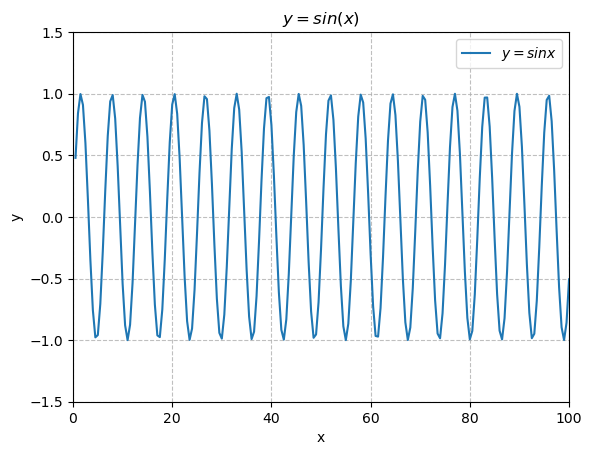

In [93]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.1, 0.5)

y = np.sin(x)

plt.plot(x, y, label= '$y = sin x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = sin(x)$')
plt.legend()
plt.xlim(0, 100)
plt.ylim(-1.5, 1.5)
plt.grid(True, which='both', linestyle = '--', alpha = 0.8)
plt.show()

#### 5. y = sin(x)/x

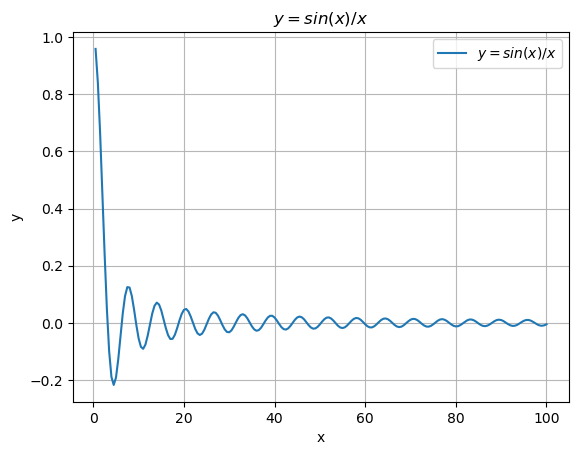

In [95]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.1, 0.5)

y = np.sin(x)/x

plt.plot(x, y, label='$y=sin(x)/x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = sin(x)/x$')
plt.grid(True, which = 'both', linestyle = '-', alpha = 0.9)
plt.legend()
plt.show()

#### 6. y = log(x)

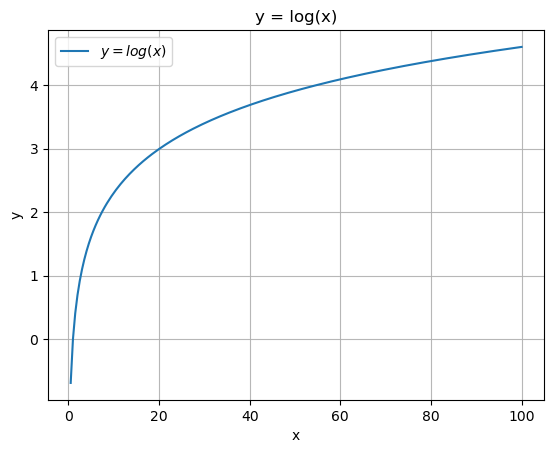

In [98]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.1, 0.5)

y = np.log(x)

plt.plot(x, y, label = '$y = log(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('y = log(x)')
plt.grid(True, which = 'both', linestyle = '-', alpha = 0.9)
plt.legend()
plt.show()

#### Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

#### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”.The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively. 

In [45]:
# Using NUMPY, creating (20 x 5) matrix uniformly 

import numpy as np
import pandas as pd

arr = np.random.uniform(1,2,size= (20, 5))

df = pd.DataFrame(arr, columns=['a', 'b', 'c', 'd', 'e'])
# print(df)
highest_std_c = df.std().idxmax()
h_std = df[highest_std_c].std()

lowest_mean_r = df.mean(axis = 1).idxmin()
l_mean = df.iloc[lowest_mean_r].mean()

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'RT8')
print(df)
                   
print('Column of highest standard deviation', highest_std_c)
print('highest standard:', h_std)
print('Row of lowest mean row', lowest_mean_r)
print('lowest mean', l_mean)

cnt_lt8 = df[df['g'] == 'LT8'].shape[0]

std_g_lt8 = df[df['g'] == 'LT8']['f'].std()
std_g_rt8 = df[df['g'] == 'RT8']['f'].std()
print('''Count of 'LT8' of df['g'] is''',cnt_lt8)

print('''Standard Deviation of df['f'] where df['g'] is LT8''', std_g_lt8)
print('''Standard Deviation of df['f'] where df['g'] is RT8''', std_g_rt8)

           a         b         c         d         e         f    g
0   1.469845  1.851624  1.173044  1.631548  1.583562  7.709623  LT8
1   1.112156  1.180741  1.877901  1.403871  1.326697  6.901365  LT8
2   1.018948  1.892600  1.571491  1.748360  1.077234  7.308634  LT8
3   1.143869  1.483305  1.844282  1.857155  1.012014  7.340626  LT8
4   1.033778  1.096873  1.008937  1.092601  1.960366  6.192554  LT8
5   1.369273  1.535760  1.602297  1.774152  1.614646  7.896129  LT8
6   1.549781  1.051489  1.897209  1.954759  1.093447  7.546684  LT8
7   1.842124  1.405481  1.884952  1.938649  1.826543  8.897749  RT8
8   1.557161  1.730491  1.296721  1.642834  1.891753  8.118960  RT8
9   1.029138  1.643879  1.467247  1.968324  1.875722  7.984308  LT8
10  1.450262  1.966660  1.756629  1.209551  1.757659  8.140761  RT8
11  1.005789  1.303156  1.714211  1.262000  1.888670  7.173826  LT8
12  1.989369  1.645637  1.661577  1.886725  1.562092  8.745400  RT8
13  1.393970  1.317996  1.027472  1.653698  1.64

#### Q12. Write a small piece of code to explain broadcasting in numpy.

In [100]:
import numpy as np

x = np.array([2,3,4])
y = 2

z = x*y
print(z)

[4 6 8]


x is one dimentional array and y is scalar value. To perform x*y, Numpy will automatically convert the scalar value y(2) to the spape of x ([2,2,2])
and then mutliplication will happen. The process of converting scalar into other shape to match is boardcasting in Numpy.

#### Q13. Write a function to compute the argmin of a numpy array.The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [47]:
def argMin(arr):
    min = arr[0]
    min_idx = 0
    for i in range(1, len(arr)):
        if min > arr[i]:
            min = arr[i]
            min_idx = i
    return min_idx

arr = np.array([3,4,6,9,1,5,8,7])
print(argMin(arr))

mn_idx = np.argmin(arr)
print(mn_idx)


4
4
